# Comparison between my scale of toxicity and Jigsaw

## Libraries

In [21]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

## Global variables

In [22]:
ROOT = Path('../../cleaned_annotation')
JIGSAW_PATH = ROOT / 'subset_jigsaw_gpt-4o-mini_cleaned.parquet'

## Load data

In [23]:
df = pd.read_parquet(JIGSAW_PATH)
df = df.drop_duplicates(subset=['msg_id'])
df['note'] = df['note'].str.extract(r'(\d+)').astype(float)

In [24]:
df.sample(5, random_state=42)

,msg_id,original_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,content,explication,...,categorie,labels,toxicite_score,categorie_list,categorie_justification,labels_list,labels_justification,note,note_justification,certitude
2082,c4554042fc328130,What a shock \n\nA wikipedia admin who happens...,1,0,1,0,1,1,Quel choc\n\nUn admin de Wikipedia qui n'est q...,**Sujet du message** : Critique d'un administr...,...,"Catégories : [""Critique explicite d’une idée t...",Labels : S0/H3/V0/R0/A3/I2 \nJustification : ...,Note : 8/10 \nJustification : Utilisation de ...,"[Critique explicite d’une idée toxique, Micro-...",Critique virulente d’un administrateur perçu c...,"[S0, H3, V0, R0, A3, I2]","Utilisation de ""petit nazi"" est une haine expl...",8.0,Utilisation de termes déshumanisants et haineu...,élevée
793,7bbb41cbe7d745ec,Stop editing Karlie's page before I kill you,1,0,0,1,0,0,Arrête d'éditer la page de Karlie avant que je...,**Sujet du message** : Modification d'une page...,...,Catégories : []\nJustification : Le message es...,Labels : S0/H0/V2/R0/A2/I2 \nJustification : ...,Note : 5/10 \nJustification : Bien que le mes...,[],Le message est agressif mais n'exhibe pas d'id...,"[S0, H0, V2, R0, A2, I2]",Le message utilise une menace violente familiè...,5.0,Bien que le message contienne une menace viole...,élevée
604,0b401ca5cefe355b,Power hungry assholes are annoying. Not pointi...,1,0,1,0,0,0,Les connards assoiffés de pouvoir sont agaçant...,**Sujet du message** : Critique des personnes ...,...,Catégories : []\nJustification : Critique clai...,Labels : S0/H0/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Critique généra...,[],Critique claire et générale d’un comportement ...,"[S0, H0, V0, R0, A2, I2]","Pas de contenu sexuel, haine ou violence ; ton...",4.0,"Critique générale avec un ton condescendant, u...",élevée
3241,099c48931b37c0bf,FisherQueen can suck my hard cock!,1,0,1,0,1,0,FisherQueen peut sucer ma grosse bite !,**Sujet du message** : Un commentaire vulgaire...,...,"Catégories : [""Micro-agression""] \nJustificat...",Labels : S1/H0/V0/R0/A2/I3 \nJustification : ...,Note : 6/10 \nJustification : Le message est ...,[Micro-agression],Insulte vulgaire visant à rabaisser subtilemen...,"[S1, H0, V0, R0, A2, I3]",Le message contient une référence sexuelle vul...,6.0,Le message est vulgaire et dégradant avec une ...,élevée
2925,3dd0b6cb60b24c2c,Semi-protected edit request on 5 May 2014 \n\n...,1,0,0,0,0,0,"Sa musique, c'est de la merde. Ce n'est pas le...",- **Sujet du message** : Avis négatif sur la m...,...,Catégories : []\nJustification : Critique néga...,Labels : S0/H0/V0/R0/A1/I2 \nJustification : ...,Note : 3/10 \nJustification : Critique négati...,[],Critique négative vulgaire mais pas de propos ...,"[S0, H0, V0, R0, A1, I2]",Langage vulgaire utilisé pour critiquer violem...,3.0,"Critique négative et langage vulgaire, provoqu...",élevée


## Comparisons

In [33]:
jigsaw_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for label in jigsaw_labels:
    avg_score = df[df[label] == 1]['note'].mean()
    std_score = df[df[label] == 1]['note'].std()
    print(f"Avg `note` for {label}=1: {avg_score:.2f} ± {std_score:.2f}")

# Average note for no labels 
avg_score = df[df[jigsaw_labels].sum(axis=1) == 0]['note'].mean()
std_score = df[df[jigsaw_labels].sum(axis=1) == 0]['note'].std()
print(f"Avg `note` for no labels: {avg_score:.2f} ± {std_score:.2f}")

Avg `note` for toxic=1: 5.91 ± 2.00
Avg `note` for severe_toxic=1: 6.63 ± 1.80
Avg `note` for obscene=1: 6.07 ± 1.99
Avg `note` for threat=1: 7.49 ± 1.69
Avg `note` for insult=1: 6.17 ± 1.90
Avg `note` for identity_hate=1: 6.07 ± 2.44
Avg `note` for no labels: 0.78 ± 1.31


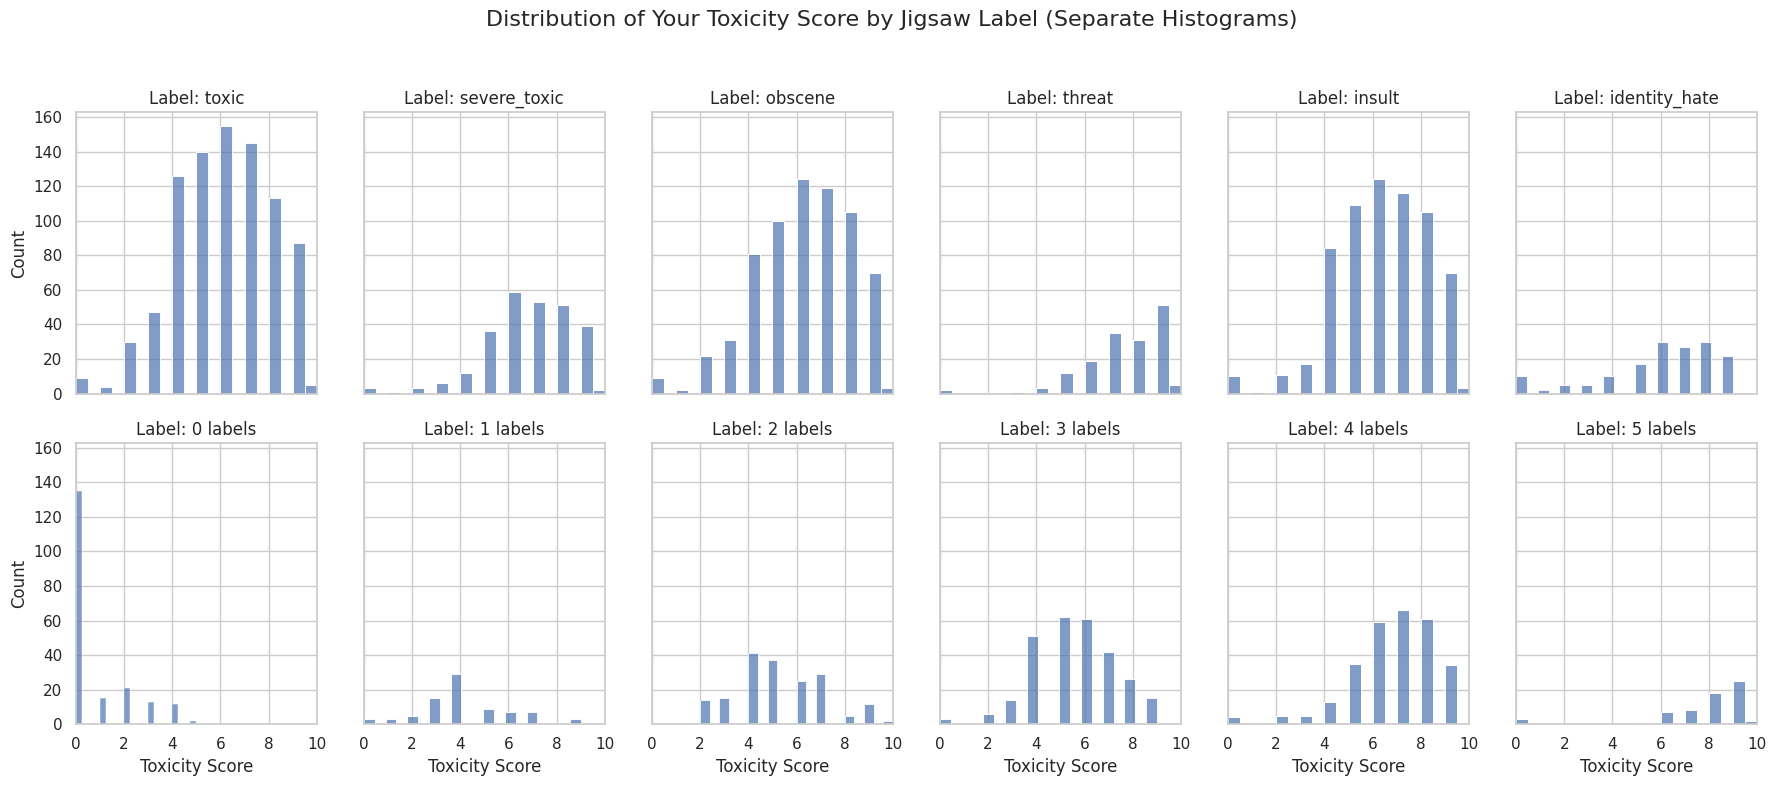

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Build long-form DataFrame
plot_data = []
for label in jigsaw_labels:
    for val in df[df[label] == 1]['note']:
        plot_data.append({'Label': label, 'note': val})

for i in range(len(jigsaw_labels)):
    for val in df[df[jigsaw_labels].sum(axis=1) == i]['note']:
        plot_data.append({'Label': f'{i} labels', 'note': val})
        
plot_df = pd.DataFrame(plot_data)

# Create subplots
labels_to_plot = jigsaw_labels + [f'{i} labels' for i in range(len(jigsaw_labels))]
n_labels = len(labels_to_plot)
fig, axes = plt.subplots(2, n_labels//2, figsize=(18, 8), sharex=True, sharey=True)

for ax, label in zip(axes.flat, labels_to_plot):
    subset = plot_df[plot_df['Label'] == label]
    sns.histplot(
        data=subset,
        x='note',
        bins=20,
        stat='count',  # or 'density' if you prefer
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"Label: {label}")
    ax.set_xlim(0, 10)
    ax.set_xlabel("Toxicity Score")
    ax.set_ylabel("Count")

plt.suptitle("Distribution of Your Toxicity Score by Jigsaw Label (Separate Histograms)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


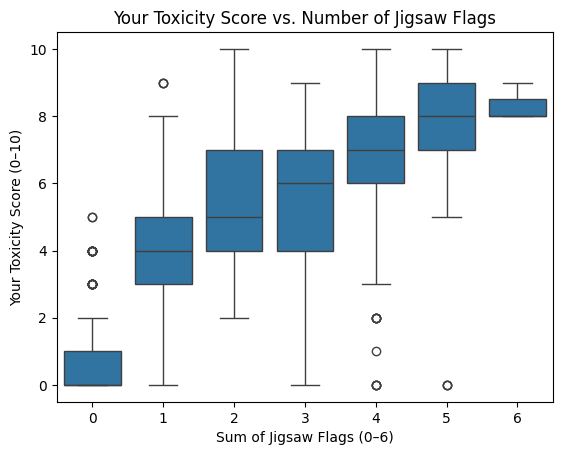

In [26]:
df['jigsaw_sum'] = df[jigsaw_labels].sum(axis=1)

# Plot your scale vs. Jigsaw sum
sns.boxplot(data=df, x='jigsaw_sum', y='note')
plt.title("Your Toxicity Score vs. Number of Jigsaw Flags")
plt.xlabel("Sum of Jigsaw Flags (0–6)")
plt.ylabel("Your Toxicity Score (0–10)")
plt.show()


###  Taxonomy Comparison (S, H, V, R, A, I)

In [27]:
# Ensure taxonomy codes are properly loaded
TAXO_CODES = ['S', 'H', 'V', 'R', 'A', 'I']

# Expand taxonomy fields from list-like strings to separate columns
for code in TAXO_CODES:
    df[code] = df['labels_list'].astype(str).str.extract(f"{code}(\d)").astype(float)

# Visualize average `note` per taxonomy level
print("\n📚 Mean toxicity score by taxonomy level:")
for code in TAXO_CODES:
    print(f"\n▶ {code} dimension:")
    for level in range(4):
        avg = df[df[code] == level]['note'].mean()
        std = df[df[code] == level]['note'].std()
        count = len(df[df[code] == level])
        print(f"  - {code}{level}: {avg:.2f} ± {std:.2f}  (n={count})")


📚 Mean toxicity score by taxonomy level:

▶ S dimension:
  - S0: 4.60 ± 2.78  (n=872)
  - S1: 6.27 ± 2.02  (n=177)
  - S2: 6.09 ± 1.96  (n=33)
  - S3: 8.50 ± 2.12  (n=10)

▶ H dimension:
  - H0: 4.46 ± 2.81  (n=802)
  - H1: 3.89 ± 2.35  (n=45)
  - H2: 6.43 ± 1.46  (n=209)
  - H3: 8.64 ± 0.59  (n=36)

▶ V dimension:
  - V0: 4.43 ± 2.65  (n=891)
  - V1: 4.62 ± 1.88  (n=24)
  - V2: 7.62 ± 1.43  (n=176)
  - V3: 9.00 ± nan  (n=1)

▶ R dimension:
  - R0: 4.91 ± 2.77  (n=1028)
  - R1: 5.15 ± 1.73  (n=27)
  - R2: 5.72 ± 2.62  (n=29)
  - R3: 5.88 ± 2.59  (n=8)

▶ A dimension:
  - A0: 0.29 ± 0.86  (n=177)
  - A1: 3.02 ± 1.11  (n=119)
  - A2: 5.07 ± 1.07  (n=443)
  - A3: 7.78 ± 0.94  (n=353)

▶ I dimension:
  - I0: 0.16 ± 0.53  (n=166)
  - I1: 2.22 ± 0.74  (n=54)
  - I2: 4.67 ± 1.20  (n=457)
  - I3: 7.53 ± 1.06  (n=415)


In [29]:
taxonomy_codes = ['S', 'H', 'V', 'R', 'A', 'I']
for code in taxonomy_codes:
    df[code] = df['labels_list'].astype(str).str.extract(f"{code}(\d)").astype(float)

/tmp/ipykernel_496727/1384157740.py:11: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/axel/miniconda3/envs/SJTU/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


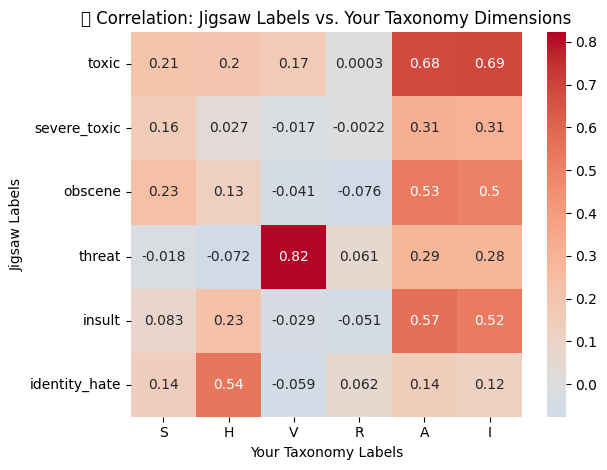

In [30]:
corr_matrix = df[jigsaw_labels + taxonomy_codes].corr()

# Only keep cross-correlations: Jigsaw × Taxonomy
cross_corr = corr_matrix.loc[jigsaw_labels, taxonomy_codes]

# 📈 Heatmap
sns.heatmap(cross_corr, annot=True, cmap="coolwarm", center=0)
plt.title("🔗 Correlation: Jigsaw Labels vs. Your Taxonomy Dimensions")
plt.xlabel("Your Taxonomy Labels")
plt.ylabel("Jigsaw Labels")
plt.tight_layout()
plt.show()